In [2]:
!pip install pyzbar
!pip install matplotlib
!pip install numpy
!pip install opencv-python-headless
!pip install zbar-py

Error processing line 1 of C:\anaconda\envs\new_env\lib\site-packages\matplotlib-3.3.1-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\anaconda\envs\new_env\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


Error processing line 1 of C:\anaconda\envs\new_env\lib\site-packages\matplotlib-3.3.1-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\anaconda\envs\new_env\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


Error processing line 1 of C:\anaconda\envs\new_env\lib\site-packages\matplotlib-3.3.1-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\anaconda\envs\new_env\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


Error processing line 1 of C:\anaconda\envs\new_env\lib\site-packages\matplotlib-3.3.1-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\anaconda\envs\new_env\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


  Using cached zbar-py-1.0.4.tar.gz (543 kB)
  Running setup.py clean for zbar-py
Failed to build zbar-py
    Running setup.py install for zbar-py: started
    Running setup.py install for zbar-py: finished with status 'error'


Error processing line 1 of C:\anaconda\envs\new_env\lib\site-packages\matplotlib-3.3.1-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\anaconda\envs\new_env\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
  ERROR: Command errored out with exit status 1:
   command: 'C:\anaconda\envs\new_env\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\oh\\AppData\\Local\\Temp\\pip-install-2gpjyqf4\\zbar-py\\setup.py'"'"'; __file__='"'"'C:\\Users\\oh\\AppData\\Local\\Temp\\pip-install-2gpjyqf4\\zbar-py\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\oh\AppData\Local\Temp\pip-wheel-qdupsfbi'


In [ ]:
!pip uninstall matplotlib

https://wikidocs.net/48927

bbanghyong
CODE128


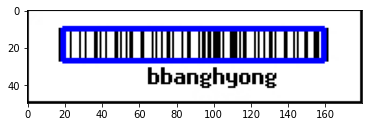

In [5]:
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

#img = cv2.imread('img/bh_bar.jpg')
import tensorflow as tf
#file_path = tf.keras.utils.get_file('youtube.jpg', 'https://github.com/kairess/qrcode_barcode_detection/raw/master/img/bh_bar.jpg')
file_path = tf.keras.utils.get_file('bh_bar.jpg', 'https://github.com/kairess/qrcode_barcode_detection/raw/master/img/bh_bar.jpg')
img = cv2.imread(file_path)

plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

decoded = pyzbar.decode(gray)

decoded #[Decoded(data=b'bbanghyong', type='CODE128', rect=Rect(left=19, top=10, width=140, height=17), polygon=[Point(x=19, y=11), Point(x=19, y=27), Point(x=159, y=26), Point(x=159, y=10)])]

for d in decoded:
    print(d.data.decode('utf-8'))
    print(d.type)

    cv2.rectangle(img, (d.rect[0], d.rect[1]), (d.rect[0] + d.rect[2], d.rect[1] + d.rect[3]), (0, 0, 255), 2)

plt.imshow(img)

https://ansan-survivor.tistory.com/308

In [12]:
import pyzbar.pyzbar as pyzbar # pip install pyzbar
import numpy as np             # pip install numpy
import cv2                     # pip install opencv-python

# 바코드 탐지하는 엔진(바코드 및 QR코드 탐지)
def decode(im):
    # find barcodes and QRcodes
    decodedObejects = pyzbar.decode(im)
    
    # print results
    for obj in decodedObjects:
        print('Type :', obj.type)
        print('Data :', obj.data, '\n')
        
    return decodedObjects

# display barcode and QRcode location
def display(im,decodedObjects):
    # Loop over all decoded objects
    for decodedObject in decodedObjects:
        points = decodedObject.polygon
        
        # if the points do not form a quad, find convex hull
        if len(points) > 4:
            hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
            hull = list(map(tuple, np.squeeze(hull)))
        else:
            hull = points;
        
        # Number the convext hull
        n = len(hull)
        
        for j in range(0,n):
            cv2.line(im, hull[(j + 1) % n], (255, 0, 0), 3)
            
    # display results
    cv2.imshow("Results",im0);
    cv2.waitKey(0);
    
# 파일명 zbar.jpg의 이미지에서 바코드를 탐지하면 해당 코드를 리턴
# main
if __name__ == '__main__':
    im = cv2.imread('zbar.jpg')
    
    decodedObjects = decode(im)
    display(im, decodedObjects)
    


NameError: name 'decodedObjects' is not defined

https://doit-dev.tistory.com/11

In [7]:
import cv2
import numpy as np

inputImage = cv2.imread(r"C:\Users\oh\python\sub\QR2.jpg")
inputImage = cv2.resize(inputImage, None,fx=0.2,fy=0.2,interpolation=cv2.INTER_AREA)

qrDecoder = cv2.QRCodeDetector()

#QR코드를 찾고 디코드해줍니다.
data,bbox,rectifiedImage = qrDecoder.detectAndDecode(inputImage)
if len(data)>0:
    print("Decoded Data:{}".format(data))
    rectifiedImage = np.uint8(rectifiedImage)
    
else:
    print("QR Code not detected")
    

Decoded Data:http://www.orbyx.com


In [10]:
import zbar
import cv2
 
file_path = "image/QR2.jpg"
 
# Zbar 라이브러리로 QR코드를 인식하기위해서 opcnCV로 이미지를 그레이 스케일로 읽어옵니다
im = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
 
 
qrcode_data = ""
 
#Zbar는 다중 QR 검출도 가능합니다
#인식된 QR 데이터들을 가져옵니다
scanner = zbar.Scanner()
results = scanner.scan(im)
for result in results:
    qrcode_data = result.data
 
# QR 코드가 인식이 되지 않았다면
# QR Code not detected
if(qrcode_data=="null"):
    print("QR Code not detected")
else:
    # QR 코드가 인식이 되었다면
    # 인식된 QR 코드의 데이터를 출력해준다
   print("Decoded Data : {}".format(qrcode_data))

ModuleNotFoundError: No module named 'zbar'

In [11]:
import pyzbar.pyzbar as pyzbar
import cv2
import tensorflow as tf
 
file_path = "image/QR2.jpg"
 
# Zbar 라이브러리로 QR코드를 인식하기위해서 opcnCV로 이미지를 그레이 스케일로 읽어옵니다
im = tf.keras.utils.get_file('bh_bar.jpg', 'https://github.com/kairess/qrcode_barcode_detection/raw/master/img/bh_bar.jpg')
 
 
qrcode_data = ""
 
#Zbar는 다중 QR 검출도 가능합니다
#인식된 QR 데이터들을 가져옵니다
scanner = pyzbar.decode(im)
for result in results:
    qrcode_data = result.data
 
# QR 코드가 인식이 되지 않았다면
# QR Code not detected
if(qrcode_data=="null"):
    print("QR Code not detected")
else:
    # QR 코드가 인식이 되었다면
    # 인식된 QR 코드의 데이터를 출력해준다
   print("Decoded Data : {}".format(qrcode_data))

ValueError: too many values to unpack (expected 3)